Note: you may need to restart the kernel to use updated packages.


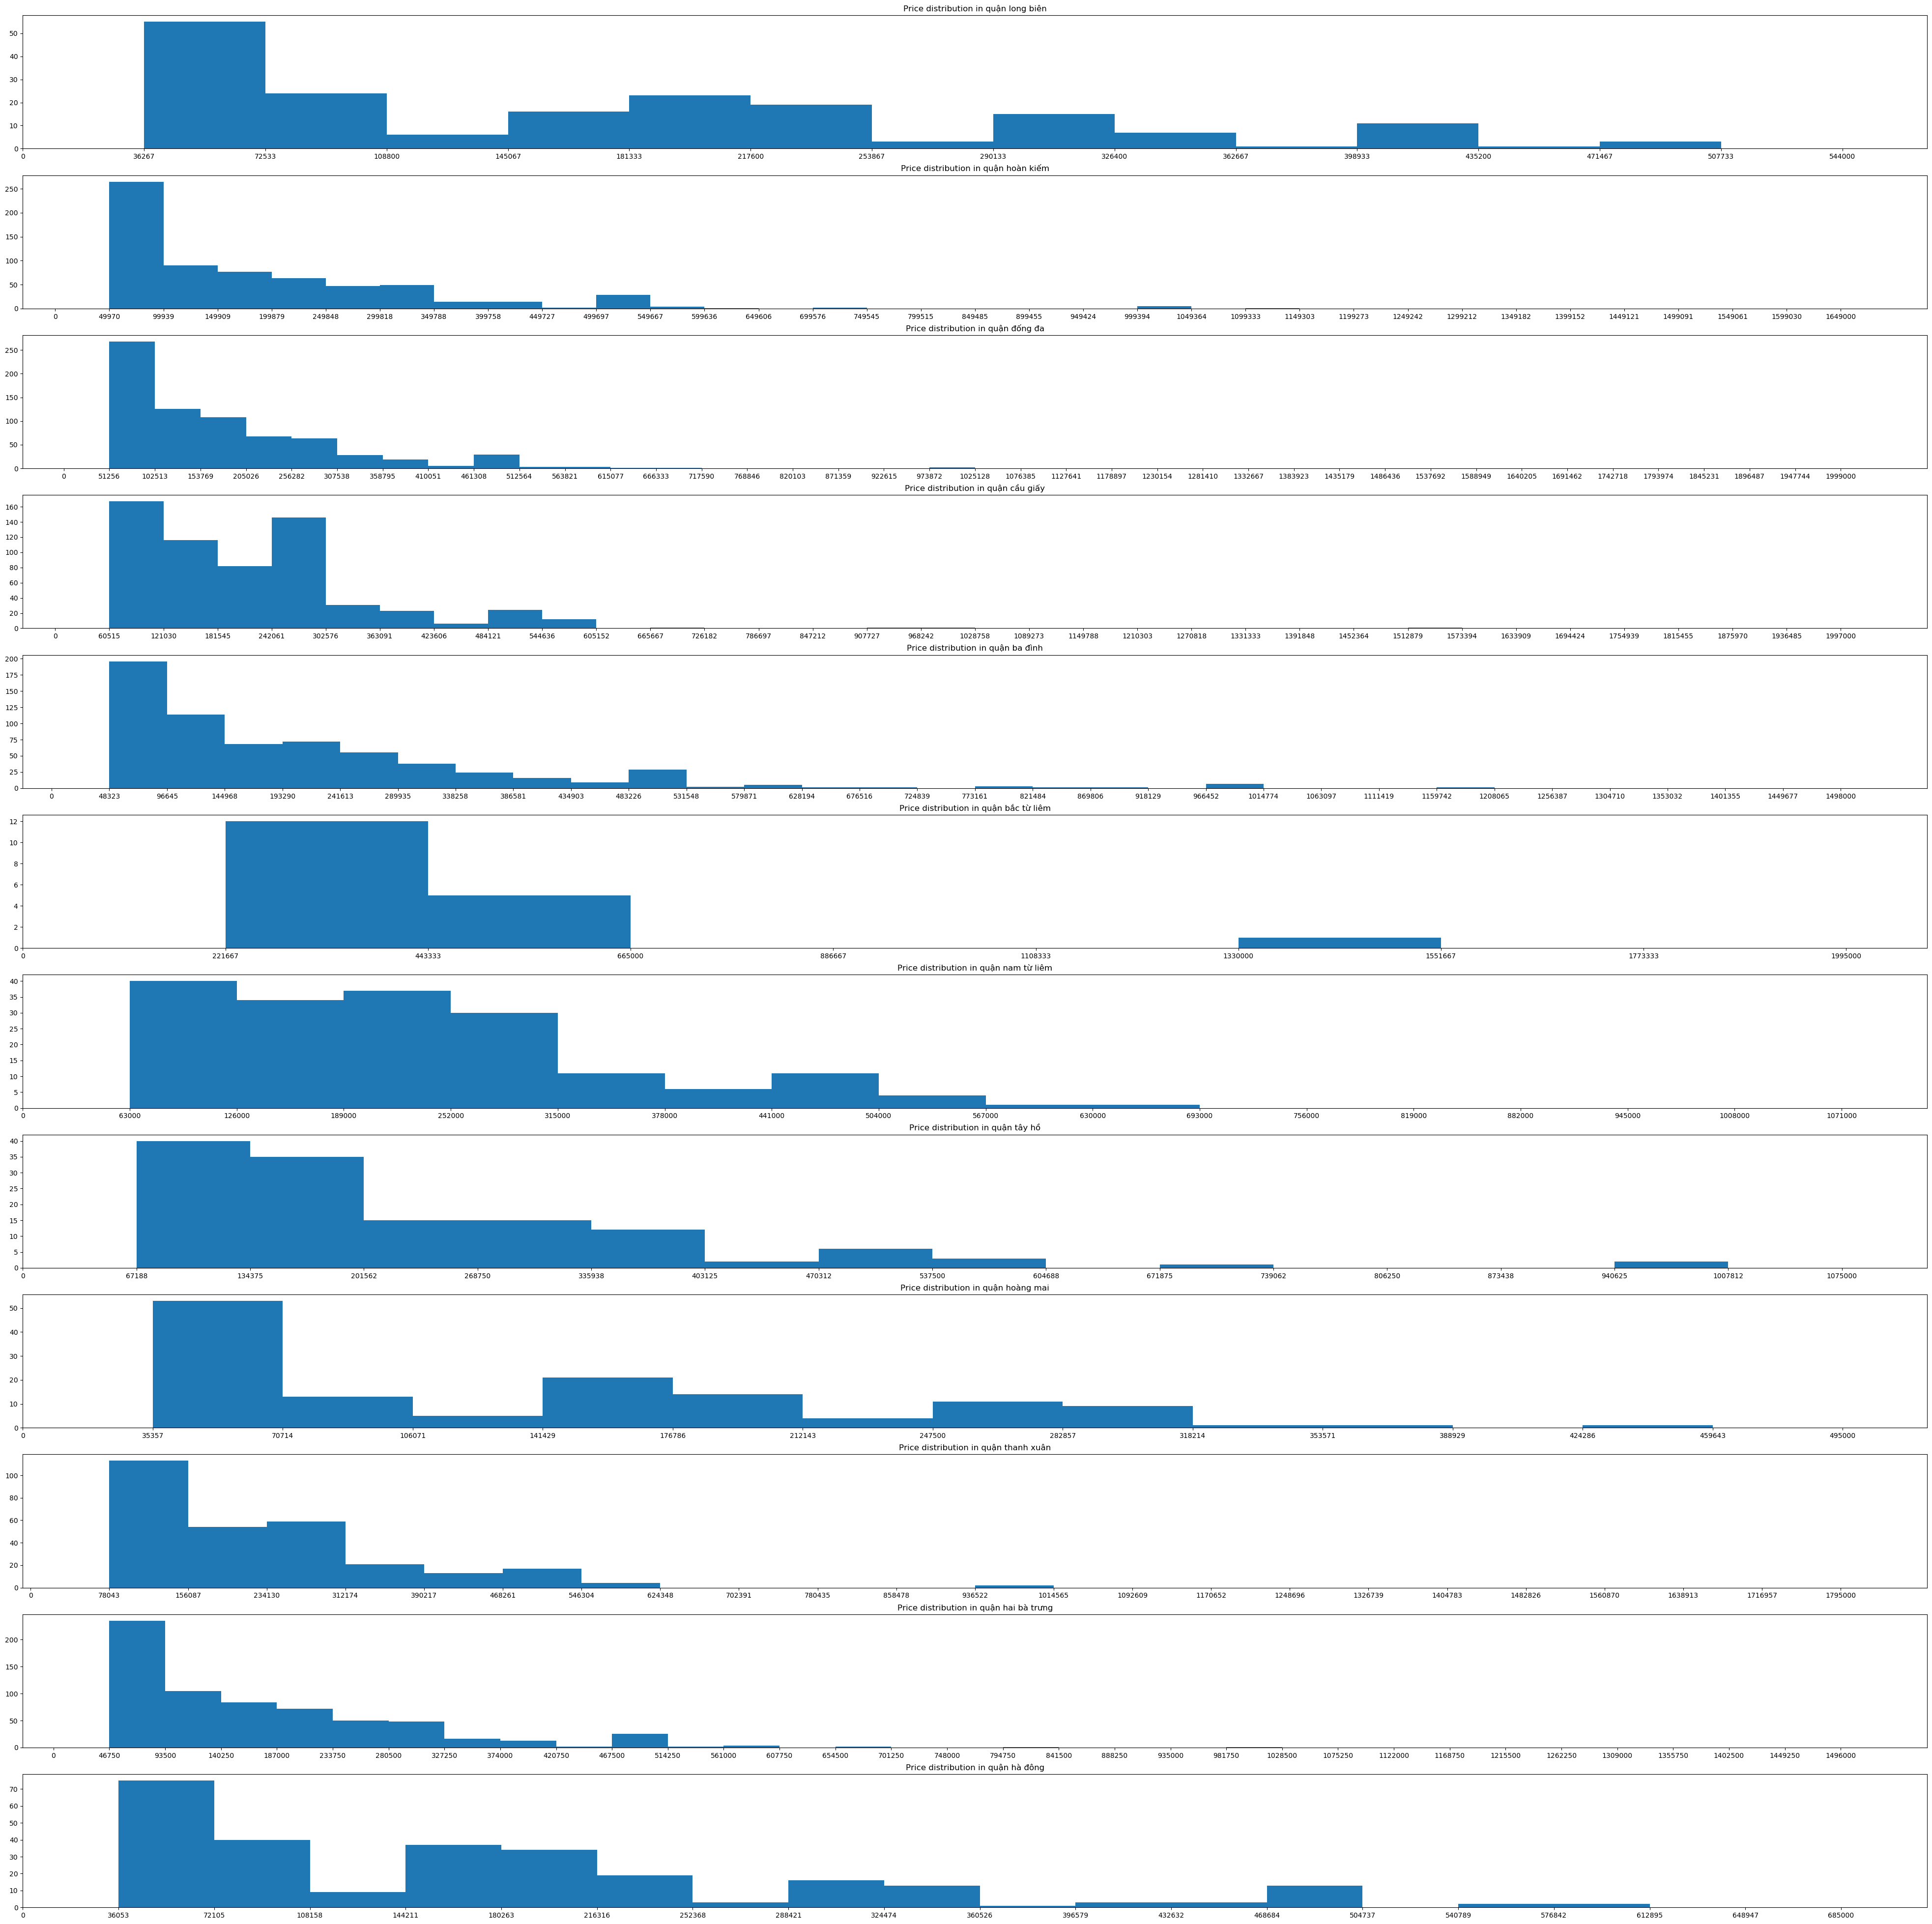

In [41]:
%pip install seaborn
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math 


# Get delimiter of the CSV file
# This is to prevent the case fields in database are separated by something not commas
def get_delimiter_of_csv(path_to_file):
    with open(path_to_file, 'r') as data:
        delim = csv.Sniffer().sniff(data.readline())
        return delim.delimiter

delimiter = get_delimiter_of_csv("./raw_restaurant_categorized.csv")
raw_data = pd.read_csv("./raw_restaurant_categorized.csv", sep=delimiter)
list_district = raw_data['location'].unique()
data_district_grouped = raw_data.groupby('location')

total_price = {}
for dist in list_district:
    total_price[dist] = []

for name, gr in data_district_grouped:
    total_price[name].extend(gr['startrange'].tolist())
    total_price[name].extend(gr['endrange'].tolist())

fig, axs = plt.subplots(len(total_price), figsize=(50,50))      
count = 0
for dataset_name in total_price:
    bins = int(math.sqrt(len(total_price[dataset_name]))//1)
    max_val = max(total_price[dataset_name])
    min_val = min(total_price[dataset_name])
    width = ((max_val-min_val)/bins)

    interval = 0
    intervals = []
    for i in range(0, bins):
        interval += width
        intervals.append(interval)
    axs[count].hist(total_price[dataset_name], intervals)
    axs[count].set_xticks(np.arange(0, max_val, width))
    axs[count].set_title("Price distribution in "+ dataset_name)
    count+=1

plt.show()



    